In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import  load_model
import streamlit as st
from tensorflow import keras
from tensorflow.keras import layers
import cv2

In [2]:
data_train_path = 'Dataset/train'
data_test_path = 'Dataset/test'
data_val_path = 'Dataset/validation'

In [3]:
img_width = 224
img_height =224 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 14631 files belonging to 3 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['cat', 'dog', 'wild']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 1500 files belonging to 3 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 374 files belonging to 3 classes.


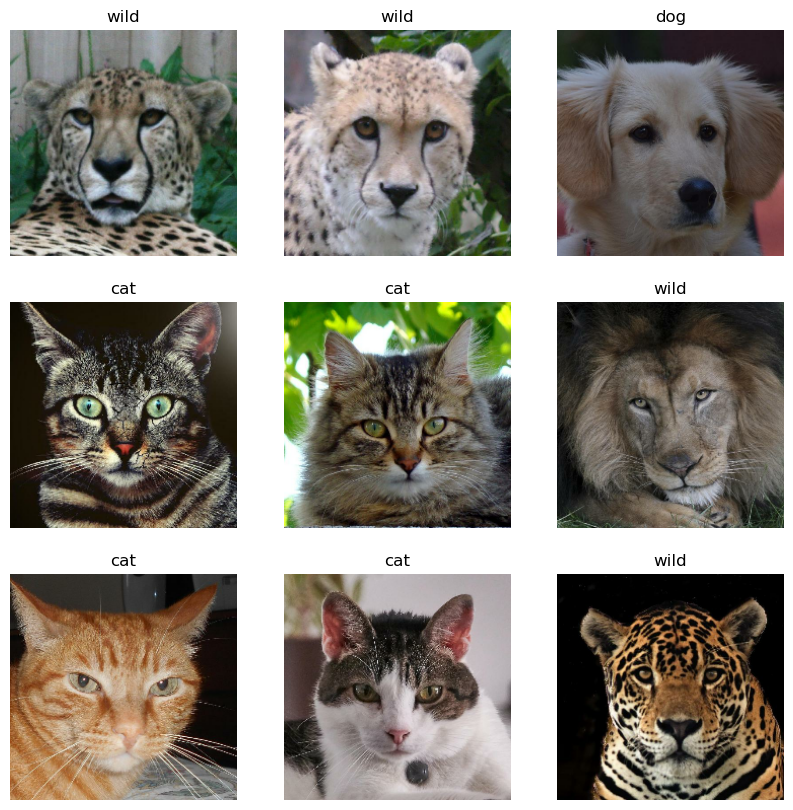

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 15
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/15
458/458 ━━━━━━━━━━━━━━━━━━━━ 220s 471ms/step - accuracy: 0.7390 - loss: 0.9282 - val_accuracy: 0.9280 - val_loss: 0.2033
Epoch 2/15
458/458 ━━━━━━━━━━━━━━━━━━━━ 218s 476ms/step - accuracy: 0.9425 - loss: 0.1574 - val_accuracy: 0.9513 - val_loss: 0.1536
Epoch 3/15
458/458 ━━━━━━━━━━━━━━━━━━━━ 233s 508ms/step - accuracy: 0.9652 - loss: 0.0952 - val_accuracy: 0.9500 - val_loss: 0.1594
Epoch 4/15
458/458 ━━━━━━━━━━━━━━━━━━━━ 243s 531ms/step - accuracy: 0.9743 - loss: 0.0687 - val_accuracy: 0.9387 - val_loss: 0.1913
Epoch 5/15
458/458 ━━━━━━━━━━━━━━━━━━━━ 257s 561ms/step - accuracy: 0.9816 - loss: 0.0498 - val_accuracy: 0.9613 - val_loss: 0.1426
Epoch 6/15
458/458 ━━━━━━━━━━━━━━━━━━━━ 252s 551ms/step - accuracy: 0.9877 - loss: 0.0327 - val_accuracy: 0.9560 - val_loss: 0.1693
Epoch 7/15
458/458 ━━━━━━━━━━━━━━━━━━━━ 237s 518ms/step - accuracy: 0.9848 - loss: 0.0443 - val_accuracy: 0.9580 - val_loss: 0.1936
Epoch 8/15
458/458 ━━━━━━━━━━━━━━━━━━━━ 215s 468ms/step - accuracy: 0.9862 -

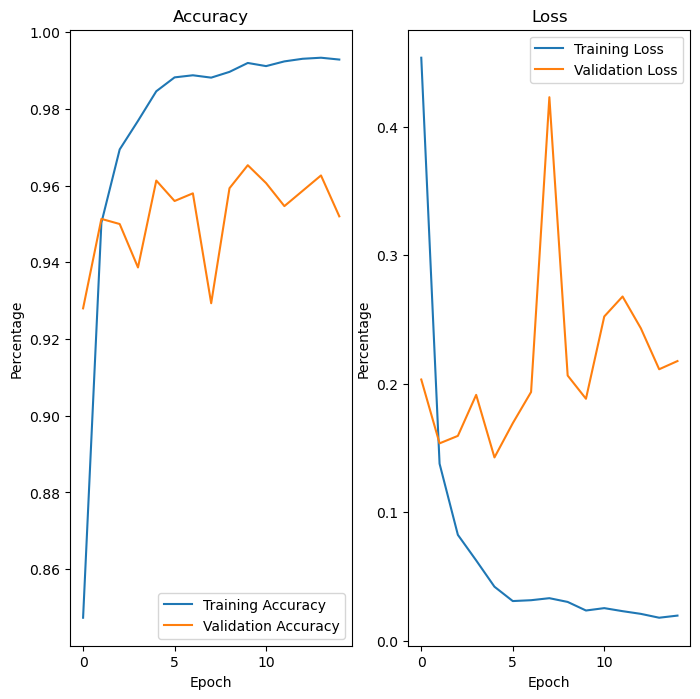

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Percentage")
plt.legend(['Training Accuracy','Validation Accuracy'])

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')
plt.xlabel("Epoch")
plt.ylabel("Percentage")
plt.legend(['Training Loss','Validation Loss'])

In [26]:
image = 'pixabay_cat_001106.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [27]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [28]:
score = tf.nn.softmax(predict)

Waste in image is cat with accuracy of 100.00


Text(0.5, 1.0, 'cat')

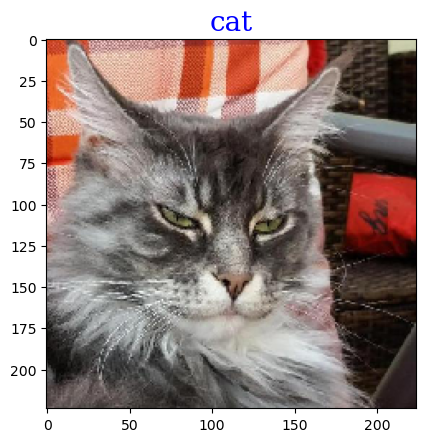

In [29]:
print('Waste in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))
plt.imshow(image)
font1 = {'family':'serif','color':'blue','size':20}
plt.title(data_cat[np.argmax(score)], fontdict = font1)

In [30]:
model.save('animal_classify.keras')

In [31]:
model.save('animal_classify.h5')